# Наследование - будет сложно, но интересно 

## Повторим несколько моментов 

**Термины**
- name, age, gender, default_parameter - это параметры 
- 'Александра', 26, 'F' - это аргументы 
- default_parameter=False - аргумент по умолчанию 

In [1]:
def some_function(name, age, gender, default_parameter=False): 
    return f"{name} {age} {gender} + default_parameter: {default_parameter}"


some_function('Александра', 26, 'F', True) # <-- позиционные аргументы (порядок важен)
some_function(name='Александра', age=26, gender='F') # <-- именованные аргументы (сейчас по порядку)
some_function(gender='F', age=26, name='Александра') # <-- именованные аргументы (порядок не важен) 
some_function('Александра', 26, gender='F', default_parameter=False) # <-- сначала порядковые, потом именованные 
some_function(default_parameter=False, gender='F', age=26, name='Александра') # <-- default_parameter на первое место 

'Александра 26 F + default_parameter: False'

**так НЕЛЬЗЯ** - почему? 

In [2]:
some_function(name='Александра', 26, 'F') # именованные до позиционных 
some_function(26, 'F', name='Александра') # 2 раза name
some_function(26, 'Александра', 'F') # порядок 

SyntaxError: positional argument follows keyword argument (1170117045.py, line 1)

**Еще немного терминов**

In [3]:
class Class:
    
    class_name = None # <-- атрибут КЛАССА
    
    def __init__(self, name=None): # <-- магический метод (метод - это функция в классе)
        self.name = name # <-- атрибут ЭКЗЕМПЛЯРА

    def get_name(self): # <-- можно называть просто метод 
                    #(но это метод экземпляра, вызывается от конкретного экземпляра + принимает в себя self) 
        return self.name

instance = Class(name='name') # <-- экземпляр класса = объект класса (1) 
instance.get_name()

'name'

    Про параметры

In [4]:
def example(a, b, c): 
    print(a, b, c)

def example(name, age, gender): # <-- параметры это локальные переменные 
    print(name, age, gender)

## Еще раз про важность классов 

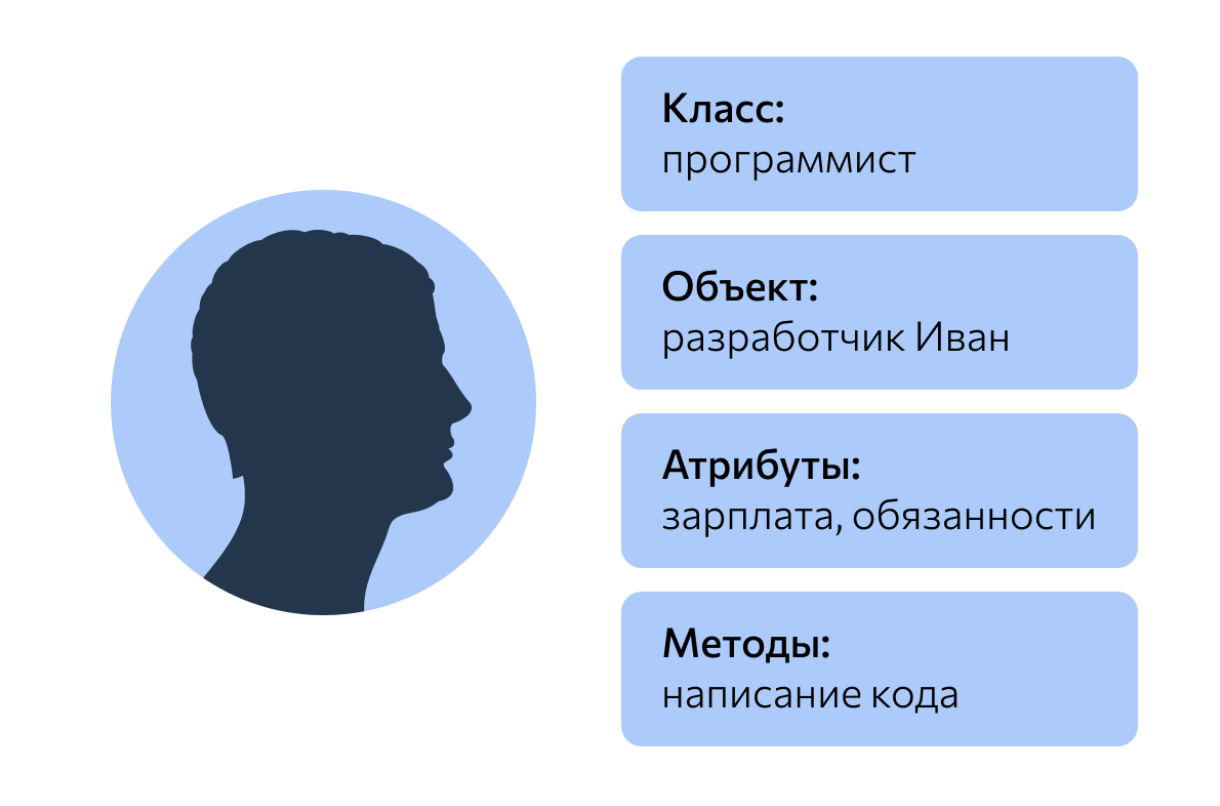

## Разница между атрибутом класса и атрибутом экземпляра (если не разобрали на прошлом вебинаре)

In [5]:
class Student: 
    
    max_age = 0 # <-- общедоступная информация 
    
    def __init__(self, name: str, age: int) -> None: 
        self.status = 'student'
        self.name = name
        self.age = age
        if self.age > Student.max_age:
            Student.max_age = self.age
            print(
                f'Сейчас максимальный возраст в классе Student = {Student.max_age}\n'
                f'Обновление произошло на студенте {self.name}'
            )

print('max_age в классе Student:', Student.max_age, end='\n\n')

student_sasha = Student(name='Александра', age=26)
print('max_age в классе Student:', Student.max_age)
print('    - Саша знает, что максимальный возраст в классе Student =',student_sasha.max_age, end='\n\n')

student_masha = Student(name='Маша', age=20)
print('max_age в классе Student:', Student.max_age)
print('    - Саша знает, что максимальный возраст в классе Student =',student_sasha.max_age)
print('    - Маша знает, что максимальный возраст в классе Student =',student_masha.max_age, end='\n\n')

student_max = Student(name='Максим', age=30)
print('max_age в классе Student:', Student.max_age)
print('    - Саша знает, что максимальный возраст в классе Student =', student_sasha.max_age)
print('    - Маша знает, что максимальный возраст в классе Student =', student_masha.max_age)
print('    - Макс знает, что максимальный возраст в классе Student =', student_max.max_age)

max_age в классе Student: 0

Сейчас максимальный возраст в классе Student = 26
Обновление произошло на студенте Александра
max_age в классе Student: 26
    - Саша знает, что максимальный возраст в классе Student = 26

max_age в классе Student: 26
    - Саша знает, что максимальный возраст в классе Student = 26
    - Маша знает, что максимальный возраст в классе Student = 26

Сейчас максимальный возраст в классе Student = 30
Обновление произошло на студенте Максим
max_age в классе Student: 30
    - Саша знает, что максимальный возраст в классе Student = 30
    - Маша знает, что максимальный возраст в классе Student = 30
    - Макс знает, что максимальный возраст в классе Student = 30


## Наверняка вы задавались вопросом, а где и когда вызывается инит, почему нельзя просто вызвать инит явно?

In [6]:
class Student:
    def __init__(self, name):
        self.name = name

student = Student('name1')
print(student.name)

# student2 = Student.__init__('name2')

# student2 = Student.__init__(student2, 'name2') # мы его еще не создали 

# Student.__init__(student, 'name2') # <--- ну а почему нельзя просто вызвать инит явно? 
# print(student.name)



name1


## Мы уже умеем писать классы, зачем нам это наследование? 

     Сейчас у нас есть 3 разных класса, которые никак не связаны 

In [7]:
from time import sleep # <-- познакомимся с новой функцией 


class Human:
    avg_height = 0  # <-- это общеизвестная информация
    total_count = 0

    def __init__(self, gender, height):  # <-- без указания невозможно создать
        self.gender = gender  # <-- а вот гендер это атрибут каждого отдельного экзмемпляра
        self.height = height
        self.sleepy = False 
        Human.avg_height = (Human.avg_height * Human.total_count + self.height) / (Human.total_count + 1)
        Human.total_count += 1 # <-- + 1 
        print(f'\n***\nprint из инита\n***')
        print(f'Сейчас средний рост в классе составляет {Human.avg_height}')
        print(f'Количество созданных экземпляров класса составляет {Human.total_count}\n')


    def sneeze(self): # <-- все люди чихают
        print('\n***\nAchoo!\n***')
        self.sleepy = True

    def sleep(self): # <-- все люди спят
        if self.sleepy: # <-- обратим внимание на отступы if-else
            print('\n***\nА пойду-ка я спать...')
            for i in range(3, 0, -1):
                print(f'До пробуждения осталось {i}')
                sleep(2)
            print('Я проснувся !')
            self.sleepy = False
        else:
            print('\n***\nЯ не хочу спать')

    def say_info_about_height(self): 
        if self.height > Human.avg_height:
            print('Я выше среднего')
        elif self.height == Human.avg_height:
            print('Я среднего роста')
        else:
            print('Я ниже среднего')


# первый человек
human = Human(gender='F', height=170)
human.sneeze()
human.sleep()
human.say_info_about_height()

# второй человек
human2 = Human(gender='F', height=190)
human2.say_info_about_height()

# третий человек
human3 = Human(gender='M', height=150)
human3.say_info_about_height()



***
print из инита
***
Сейчас средний рост в классе составляет 170.0
Количество созданных экземпляров класса составляет 1


***
Achoo!
***

***
А пойду-ка я спать...
До пробуждения осталось 3
До пробуждения осталось 2
До пробуждения осталось 1
Я проснувся !
Я среднего роста

***
print из инита
***
Сейчас средний рост в классе составляет 180.0
Количество созданных экземпляров класса составляет 2

Я выше среднего

***
print из инита
***
Сейчас средний рост в классе составляет 170.0
Количество созданных экземпляров класса составляет 3

Я ниже среднего


In [8]:
class Student:
    def __init__(self, bookworm=False):
        self.status = 'student'  # <-- захардкодили 
        self.bookworm = bookworm  # <-- внешняя информация (задана по умолчанию) 

    def study(self):
        if self.bookworm:
            print('Ну я прочитал конспект')
        else:
            print('Я списал домашку')
            
student = Student(bookworm=True)
student.study()

Ну я прочитал конспект


In [9]:
class StudentBigUniversity:
    def __init__(self, bookworm=True):
        self.status = 'student'  # <-- захардкодили
        self.bookworm = bookworm  # <-- внешняя информация (задана по умолчанию)

    def study(self):
        if self.bookworm:
            print('Я получил нобелевку, пока готовил завтрак')
        else:
            print('Я прочитал все учебники в этом мире')

student = StudentBigUniversity(bookworm=True)
student.study()

Я получил нобелевку, пока готовил завтрак


но StudentBigUniversity это же Student, а Student это Human, то есть StudentBigUniversity тоже должен уметь чихать и спать !!!! 

## Синтаксис для реализации наследования 

    object - это БАЗА 

In [10]:
object

object

In [11]:
dir(object)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [12]:
class NewClass(object): # <-- это то же самое, что БЕЗ скобочек 
    ...

class NewClass(): 
    ...

class NewClass: 
    ...

print(NewClass.mro()) # как метод 
print(NewClass.__mro__) # как атрибут 

[<class '__main__.NewClass'>, <class 'object'>]
(<class '__main__.NewClass'>, <class 'object'>)


    Наш класс уже унаследовал много чего из object

In [13]:
print(dir(NewClass))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__']


- **object** является корневым классом для всех классов. Все классы в Python (как встроенные, так и пользовательские) неявно или явно наследуются от этого класса. 
- **object** обеспечивает стандартное поведение для всех объектов в Python и служит основой для создания всех новых классов.

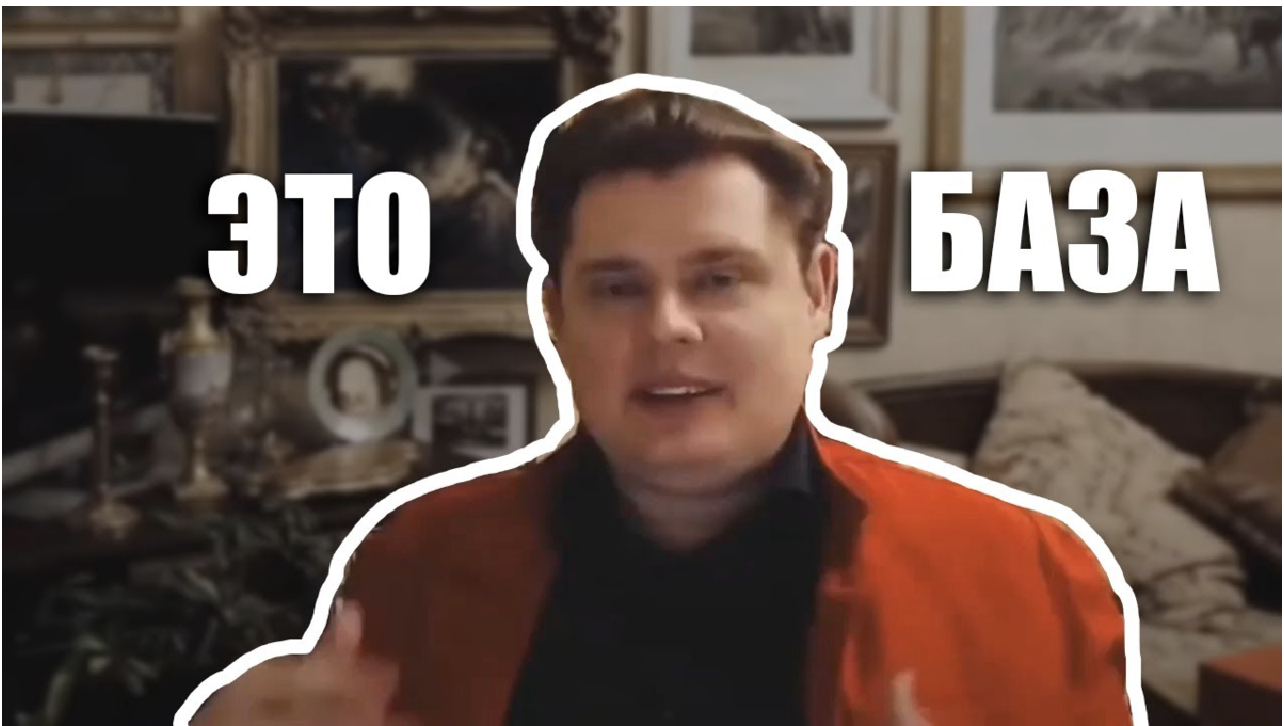

    Цепочка наследования (на пальцах)

In [14]:
print(NewClass.mro())

[<class '__main__.NewClass'>, <class 'object'>]


Цепочка наследования в Python — это последовательность классов, через которые происходит поиск атрибутов и методов. Когда вы обращаетесь к атрибуту или методу объекта, Python последовательно проверяет сам объект, его класс и затем классы-предки, пока не найдет запрашиваемый атрибут или метод. Этот процесс продолжается до тех пор, пока не будет достигнут базовый класс `object`.

**Порядок разрешения методов (MRO)**

Python использует алгоритм C3-линеаризации (или C3 Linearization) для определения порядка разрешения методов (MRO - Method Resolution Order) в цепочке наследования. MRO определяет порядок, в котором Python будет искать атрибуты и методы. Вызвать MRO можно с помощью атрибута `__mro__` или функции `mro()`.

Цепочка наследования в Python — это механизм, который определяет порядок поиска атрибутов и методов в иерархии классов. Понимание MRO и цепочки наследования важно для правильного использования наследования, особенно при работе с множественным наследованием.

In [15]:
class NewClass:
    ...

class NextNewClass(NewClass): # <-- вот теперь точно нужны скобочки 
    ...

class NextNextNewClass(NextNewClass): # <-- тут тоже 
    ...

instance = NextNextNewClass()

print(NextNewClass.mro())
print(NextNextNewClass.mro())

[<class '__main__.NextNewClass'>, <class '__main__.NewClass'>, <class 'object'>]
[<class '__main__.NextNextNewClass'>, <class '__main__.NextNewClass'>, <class '__main__.NewClass'>, <class 'object'>]


`isinstance` — это встроенная функция в Python, которая проверяет, является ли объект экземпляром указанного класса или его подклассов. Она возвращает `True`, если объект является экземпляром или наследником данного класса, и `False` в противном случае.

**Синтаксис**

```python
isinstance(object, classinfo)
```

- `object`: объект, который нужно проверить.
- `classinfo`: класс, либо кортеж классов, против которых проверяется объект.



In [16]:
# примеры для наглядности  
print(isinstance('string', str))
print(isinstance(6, float))

True
False


In [17]:
class NewClass:
    ...

class NextNewClass(NewClass): # <-- вот теперь точно нужны скобочки 
    ...

class NextNextNewClass(NextNewClass): # <-- тут тоже 
    ...

instance = NextNextNewClass()

print(isinstance(instance, NextNextNewClass))
print(isinstance(instance, NextNewClass))
print(isinstance(instance, NewClass))
print(isinstance(instance, object))


True
True
True
True


`issubclass` — это встроенная функция в Python, которая проверяет, является ли класс подклассом другого класса или его подклассов. Она возвращает `True`, если первый класс является подклассом второго класса (или любого класса из кортежа классов), и `False` в противном случае.

**Синтаксис**

```python
issubclass(class, classinfo)
```

- `class`: класс, который нужно проверить.
- `classinfo`: класс, либо кортеж классов, против которых проверяется `class`.


In [18]:
class NewClass:
    ...

class NextNewClass(NewClass): # <-- вот теперь точно нужны скобочки 
    ...

class NextNextNewClass(NextNewClass): # <-- тут тоже 
    ...

instance = NextNextNewClass()

# issubclass 
print('1', issubclass(NextNextNewClass, NewClass)) 
print('2', issubclass(NextNewClass, NewClass))
print('3', issubclass(NextNextNewClass, NextNewClass)) 

print('4', issubclass(NewClass, NextNextNewClass)) 

print('5', issubclass(NewClass, object)) 

1 True
2 True
3 True
4 False
5 True


    А теперь вернемся к нашему примеру 

In [19]:
from time import sleep 


class Human(object):
    avg_height = 0  
    total_count = 0

    def __init__(self, gender, height): 
        self.gender = gender  
        self.height = height
        self.sleepy = False
        Human.avg_height = (Human.avg_height * Human.total_count + self.height) / (Human.total_count + 1)
        Human.total_count += 1
        print(f'\n***\nprint из инита\n***')
        print(f'Сейчас средний рост в классе составляет {Human.avg_height}')
        print(f'Количество созданных экземпляров класса составляет {Human.total_count}\n')


    def sneeze(self): 
        print('\n***\nAchoo!\n***')
        self.sleepy = True

    def sleep(self): 
        if self.sleepy:
            print('\n***\nА пойду-ка я спать...')
            for i in range(3, 0, -1):
                print(f'До пробуждения осталось {i}')
                sleep(2)
            print('Я проснувся !')
            self.sleepy = False
        else:
            print('\n***\nЯ не хочу спать')

    def say_info_about_height(self): 
        if self.height > Human.avg_height:
            print('Я выше среднего')
        elif self.height == Human.avg_height:
            print('Я среднего роста')
        else:
            print('Я ниже среднего')


class Student(Human):
    def __init__(self, bookworm=False):
        self.status = 'student'  
        self.bookworm = bookworm 
        self.document = True

    def have_fun(self):
        print('Тусовочка :):):):)')
    
    def study(self):
        if self.bookworm:
            print('Ну я прочитал конспект')
        else:
            print('Я списал домашку')
            

class StudentBigUniversity(Student):
    def __init__(self, bookworm=True):
        self.status = 'student big university'  
        self.bookworm = bookworm  

    def study(self): # <-- переопределили метод (мы всегда идем поцепочке наследования)
        if self.bookworm:
            print('Я получил нобелевку, пока готовил завтрак')
        else:
            print('Я прочитал все учебники в этом мире')


student = StudentBigUniversity(bookworm=True) 
student.study() # <-- обратим внимание, откуда он взял этот метод 
print(student.status)
print(' | '.join([i for i in dir(student) if '__' not in i])) # <-- посмотрим, что внутри


Я получил нобелевку, пока готовил завтрак
student big university
avg_height | bookworm | have_fun | say_info_about_height | sleep | sneeze | status | study | total_count


    [музыкальная паузы, чтобы переварить информацию]

## А какие виды наследования вообще есть?

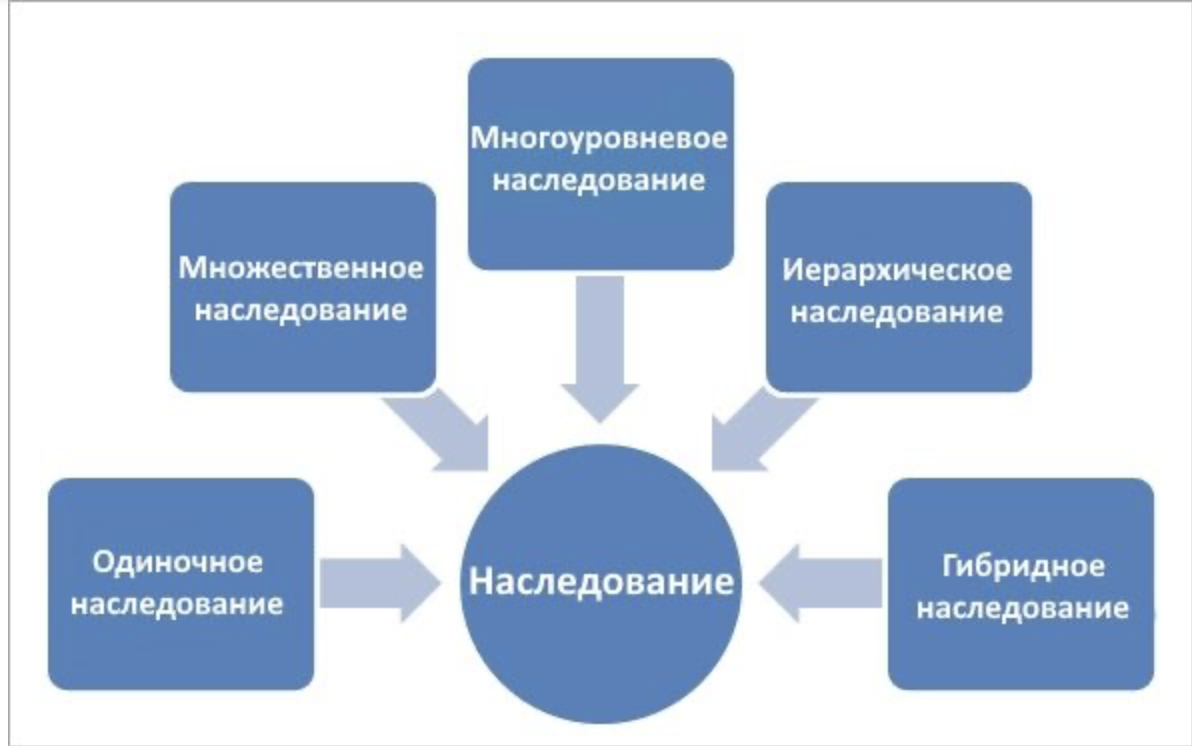

## Одиночное наследование

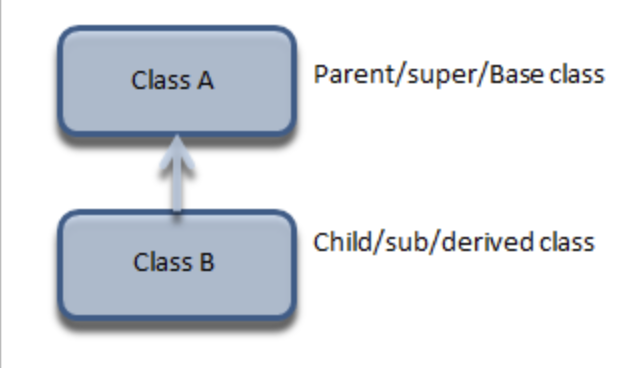

### Множественное наследование

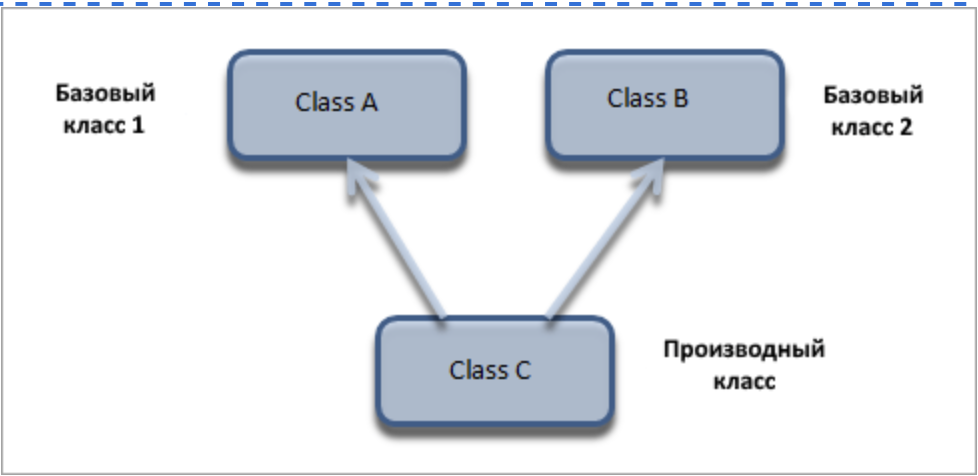

## Многоуровневое наследование

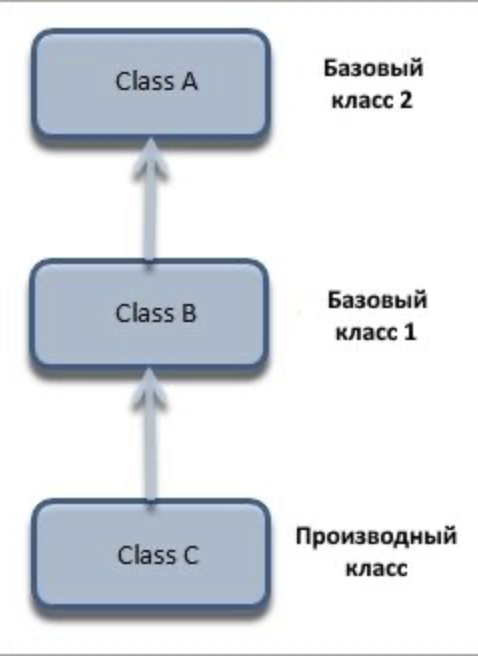

### Гибридное наследование

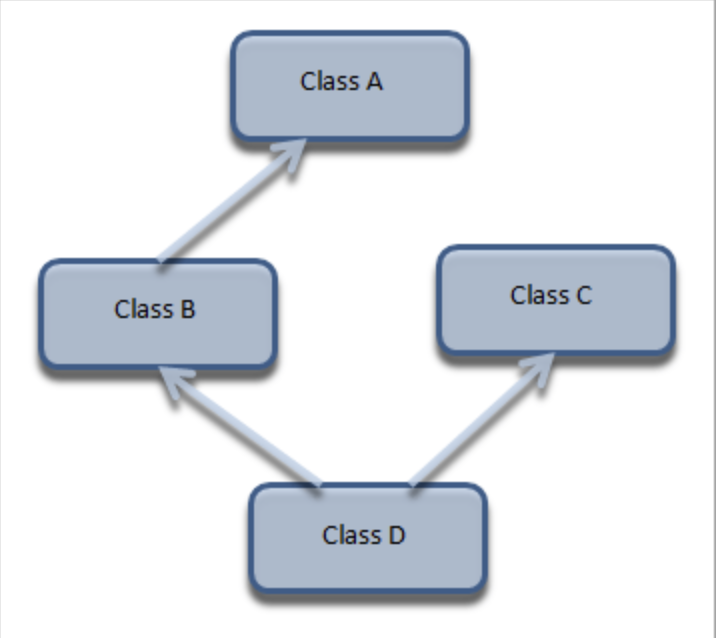

### Иерархическое наследование 

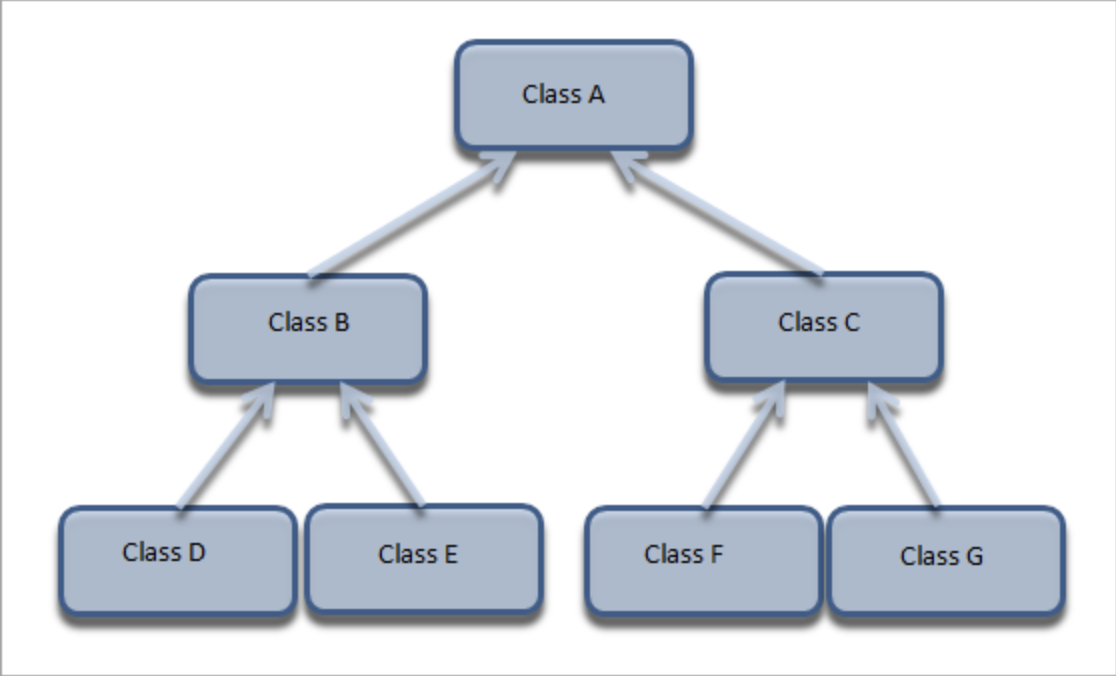

Алмазная проблема (или ромбовидное наследование) — это проблема, которая возникает в объектно-ориентированном программировании при использовании множественного наследования, когда два класса наследуются от одного общего предка, а затем объединяются в одном классе-наследнике. Это создает "алмазообразную" структуру в графе наследования, отсюда и название.

### Пример алмазной проблемы

Рассмотрим пример:

```python
class A:
    def __init__(self):
        print("A.__init__")
    
    def method(self):
        print("Method from A")

class B(A):
    def __init__(self):
        super().__init__()
        print("B.__init__")

class C(A):
    def __init__(self):
        super().__init__()
        print("C.__init__")

class D(B, C):
    def __init__(self):
        super().__init__()
        print("D.__init__")

d = D()
d.method()
```

### Алмазная структура:

```
      A
     / \
    B   C
     \ /
      D
```

### Проблемы, возникающие из-за этой структуры

1. **Множественное выполнение инициализации общего предка**:
   - Если мы вызовем конструктор `D`, он последовательно вызовет конструкторы `B` и `C`, которые, в свою очередь, вызовут конструктор `A`. Вопрос в том, сколько раз будет вызван конструктор `A`?

2. **Разрешение методов (Method Resolution Order, MRO)**:
   - При вызове метода у экземпляра `D`, какой метод будет вызван, если этот метод определен в `B`, `C` и `A`?

### Python и алмазная проблема

Python решает алмазную проблему с помощью алгоритма C3-линеаризации (или C3 Linearization), который определяет порядок разрешения методов (MRO).

### MRO в Python

Мы можем увидеть порядок разрешения методов с помощью атрибута `__mro__` или функции `mro()`.

```python
print(D.mro())
```

### Результат:

```
[<class '__main__.D'>, <class '__main__.B'>, <class '__main__.C'>, <class '__main__.A'>, <class 'object'>]
```

### Как это работает в нашем примере:

1. **Вызов конструктора**:
   - Когда вызывается `D.__init__`, `super()` в `D` вызывает `B.__init__`, затем `super()` в `B` вызывает `C.__init__`, и `super()` в `C` вызывает `A.__init__`.
   - Конструктор `A` вызывается только один раз благодаря MRO.

2. **Вызов метода**:
   - Когда вызывается `d.method()`, Python ищет метод `method` в классе `D`, затем в `B`, затем в `C`, и, наконец, в `A`.

### Пример с вызовом конструктора и метода:

```python
class A:
    def __init__(self):
        print("A.__init__")
    
    def method(self):
        print("Method from A")

class B(A):
    def __init__(self):
        super().__init__()
        print("B.__init__")

class C(A):
    def __init__(self):
        super().__init__()
        print("C.__init__")

class D(B, C):
    def __init__(self):
        super().__init__()
        print("D.__init__")

d = D()
d.method()
```

### Вывод:

```
A.__init__
C.__init__
B.__init__
D.__init__
Method from A
```

### Заключение

Алмазная проблема в наследовании может вызвать многократное выполнение методов общего предка и проблемы с порядком вызова методов. Python решает эту проблему с помощью C3-линеаризации, что гарантирует, что каждый метод вызывается только один раз в корректном порядке.

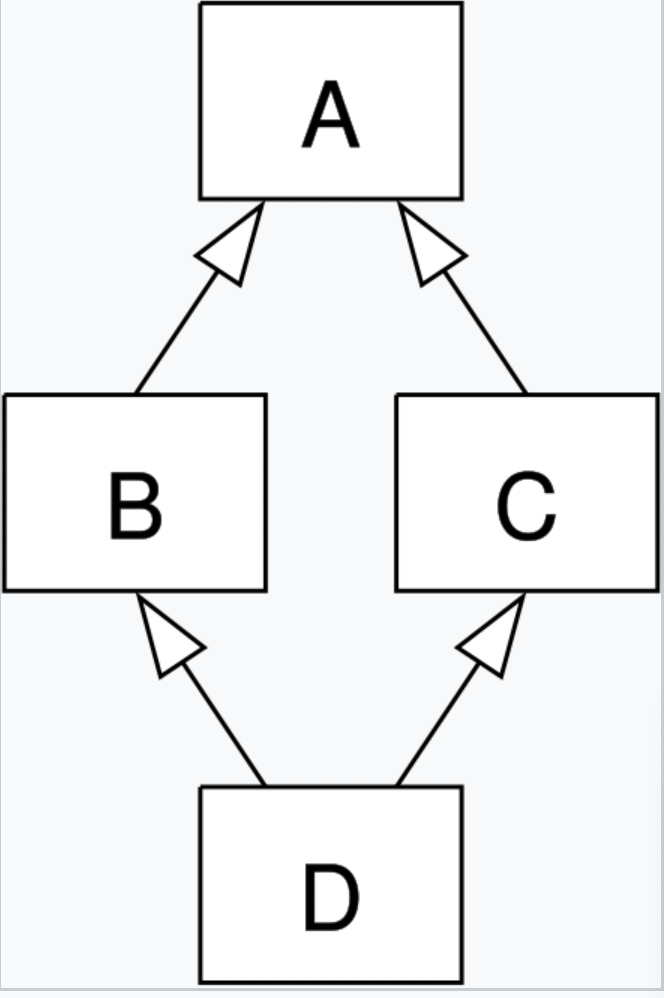



### Почему `A.greet` вызывается только один раз

Когда мы вызываем `d.greet()`, Python начинает с метода `greet` класса `D`. Внутри этого метода есть вызов `super().greet()`, который переходит к следующему классу в MRO, то есть к классу `B`.

1. В классе `D` выполняется `print("Hello from D")`, затем вызывается `super().greet()`, что переходит к `B.greet`.
2. В классе `B` выполняется `print("Hello from B")`, затем вызывается `super().greet()`, что переходит к `C.greet`. **!!!!!!!!!!!!!**
3. В классе `C` выполняется `print("Hello from C")`, затем вызывается `super().greet()`, что переходит к `A.greet`.
4. В классе `A` выполняется `print("Hello from A")`.

Метод `greet` класса `A` вызывается только один раз, так как после выполнения метода `A.greet` больше нет вызова `super().greet()`, который бы продолжил поиск по MRO. Порядок разрешения методов гарантирует, что каждый класс вызывается только один раз в порядке, определённом MRO.

благодаря порядку разрешения методов (MRO), Python гарантирует, что каждый метод вызывается только один раз, даже при множественном наследовании.

In [70]:
class A:
    def greet(self):
        print("Hello from A") # <---- (4)

class B(A):
    def greet(self):
        print("Hello from B") # <---- наш первый родитель (2)
        super().greet()  # Вызов метода greet класса A

class C(A):
    def greet(self):
        print("Hello from C") # <---- (3)
        super().greet()  # Вызов метода greet класса A

class D(B, C):
    def greet(self):
        print("Hello from D") # <---- в первую очередь делаем это (1)
        super().greet()  # Вызов метода greet классов B и C

d = D()
print(D.mro()) # <---- сюда вставляем класс
d.greet()

[<class '__main__.D'>, <class '__main__.B'>, <class '__main__.C'>, <class '__main__.A'>, <class 'object'>]
Hello from D
Hello from B
Hello from C
Hello from A


## Вот сейчас будет super сложно 

    Зачем нужен супер?

    Пример с переиспользованием кода 

In [20]:
class Student:
    def __init__(self, name, age):
        self.name = name
        self.age = age


class SS(Student):
    def __init__(self, name, age, university):
        self.name = name
        self.age = age
        self.university = university

    def say_hello(self):
        print('hello')


student = SS('name1', age=10, university='NSU')
print(student.name)




name1


    По красоте 

In [21]:
class Student:
    def __init__(self, name, age):
        self.name = name
        self.age = age


class SS(Student):
    def __init__(self, name, age, university):
        super().__init__(name, age) # <-- передали только нужное (name, age)
        self.university = university

    def say_hello(self):
        print('hello')


student = SS('name1', age=10, university='NSU')
print(student.name)




name1


    Student.__init__

In [22]:
class Student:
    def __init__(self, name, age):
        self.name = name
        self.age = age


class SS(Student):
    def __init__(self, name, age, university):
        Student.__init__(self, name, age) # <-- передали только нужное (name, age)
        self.university = university

    def say_hello(self):
        print('hello')


student = SS('name1', age=10, university='NSU')
print(student.name)


# student <-- это self
# в __init__ в классе Student БУКВАЛЬНО происходит это: 
# student.name = 'name1'
# student.age = 10




name1


    БЕЗ наследования

In [ ]:
class Student:
    def __init__(self, name, age):
        self.name = name
        self.age = age


class SS():
    def __init__(self, name, age, university):
        Student.__init__(self, name, age) # <-- передали только нужное (name, age)
        self.university = university

    def say_hello(self):
        print('hello')


student = SS('name1', age=10, university='NSU')
print(student.name)






### Что делает `super`?

`super` используется в дочернем классе для вызова методов или конструктора его родительского класса. Это помогает вам использовать и расширять функциональность родительского класса, не переписывая его методы.

### Простой пример

Представьте, что у нас есть два класса: `Animal` (родительский класс) и `Dog` (дочерний класс).

```python
class Animal:
    def __init__(self, name):
        self.name = name

    def speak(self):
        print(f"{self.name} makes a sound")

class Dog(Animal):
    def __init__(self, name, breed):
        super().__init__(name)  # Вызов конструктора родительского класса (что произойдет?)
        self.breed = breed

    def speak(self):
        super().speak()  # Вызов метода speak родительского класса (что произойдет?)
        print(f"{self.name} barks")

# Создаем объект Dog
dog = Dog("Buddy", "Golden Retriever")
dog.speak()
```

### Что происходит в этом примере?

1. **Конструктор (`__init__`):**
   - Когда создается объект `Dog`, вызывается его конструктор `__init__`.
   - Внутри конструктора `Dog` используется `super().__init__(name)`, чтобы вызвать конструктор `Animal`. Это позволяет установить `name` для объекта `Dog`.

2. **Метод (`speak`):**
   - Когда вызывается `dog.speak()`, сначала выполняется `super().speak()`, что вызывает метод `speak` из класса `Animal`. Это выводит: `Buddy makes a sound`.
   - Затем выполняется оставшаяся часть метода `speak` класса `Dog`, которая выводит: `Buddy barks`.

### Зачем нужен `super`?

- **Избегает дублирования кода:** Вы можете повторно использовать код из родительского класса, а не переписывать его.
- **Обеспечивает расширяемость:** Вы можете добавлять дополнительное поведение в дочерние классы без изменения родительских классов.
- **Упрощает работу с множественным наследованием:** `super` упрощает вызов методов из нескольких родительских классов в правильном порядке.


# МЫ НИКОГДА НЕ ОБРАЩАЕМСЯ ИЗ РОДИТЕЛЬСКОГО КЛАССА К ДОЧЕРНЕМУ ! 
# ТОЛЬКО ИЗ ДОЧЕРНЕГО МОЖНО ПОДТЯНУТЬ НУЖНОЕ ИЗ РОДИТЕЛЬСКОГО 
(в коде это можно сделать, но это плохая практика)

In [ ]:
class Student:
    def __init__(self, name): # <------------ self это кто такой тут? 
        self.name = name
        self.say_hello() # <------------ НЕ ДЕЛАЕМ ТАК ! 


class SS(Student):
    def __init__(self, name):
        super().__init__(name)

    def say_hello(self):
        print('hello')


student = SS('name1')
print(student.name)


### Пример 1: Использование `super` ВОТ ПРЯМ ПОДРОБНО НАДО НА НЕГО ПОСМОТРЕТЬ

В этом примере мы создаем два класса, `Parent` и `Child`, и используем `super` для вызова методов родительского класса.

```python
class Parent:
    def __init__(self, name):
        self.name = name
        print(f"Parent initialized with name: {self.name}")

    def greet(self):
        print(f"Hello from Parent, {self.name}")

class Child(Parent):
    def __init__(self, name, age):
        super().__init__(name)  # Вызов конструктора родительского класса (self не передаем)
        self.age = age
        print(f"Child initialized with name: {self.name} and age: {self.age}")

    def greet(self):
        super().greet()  # Вызов метода greet родительского класса
        print(f"Hello from Child, age: {self.age}")

# Создаем объект класса Child
child = Child("Alice", 10)
child.greet()
```

### Вывод:
```
Parent initialized with name: Alice
Child initialized with name: Alice and age: 10
Hello from Parent, Alice
Hello from Child, age: 10
```

В этом случае конструктор и метод `greet` из родительского класса `Parent` вызываются через `super`, что позволяет использовать и расширять их функциональность в классе `Child`.

### Пример 2: Отсутствие использования `super`

Теперь создадим аналогичный пример, но без использования `super`.

```python
class Parent:
    def __init__(self, name):
        self.name = name
        print(f"Parent initialized with name: {self.name}")

    def greet(self):
        print(f"Hello from Parent, {self.name}")

class Child(Parent):
    def __init__(self, name, age):
        # Вызов конструктора родительского класса напрямую
        Parent.__init__(self, name) # <----- self !!!!
        self.age = age
        print(f"Child initialized with name: {self.name} and age: {self.age}")

    def greet(self):
        # Вызов метода greet родительского класса напрямую
        Parent.greet(self) # <----- self !!!!
        print(f"Hello from Child, age: {self.age}")

# Создаем объект класса Child
child = Child("Alice", 10)
child.greet()
```

### Вывод:
```
Parent initialized with name: Alice
Child initialized with name: Alice and age: 10
Hello from Parent, Alice
Hello from Child, age: 10
```

### Сравнение результатов

#### 1. Код с использованием `super`:
- Более гибкий и простой в поддержке при изменении иерархии классов.
- Поддерживает множественное наследование и корректное разрешение методов (MRO).
- Код выглядит чище и меньше зависим от конкретного родительского класса.

#### 2. Код без использования `super`:
- Нужно явно указывать имя родительского класса.
- При изменении родительского класса (например, смена имени класса) придется обновлять вызовы во всех местах, где он используется.
- Множественное наследование становится сложнее в управлении, так как разрешение методов необходимо контролировать вручную.

### Пример с множественным наследованием и использованием `super`

Рассмотрим пример с использованием `super` при множественном наследовании.

```python
class A:
    def greet(self):
        print("Hello from A")

class B(A):
    def greet(self):
        print("Hello from B")
        super().greet()

class C(A):
    def greet(self):
        print("Hello from C")
        super().greet()

class D(B, C):
    def greet(self):
        print("Hello from D")
        super().greet()

d = D()
d.greet()
```

### Вывод:
```
Hello from D
Hello from B
Hello from C
Hello from A
```

### Пример без использования `super`

А теперь аналогичный пример без `super`:

```python
class A:
    def greet(self):
        print("Hello from A")

class B(A):
    def greet(self):
        print("Hello from B")
        A.greet(self)

class C(A):
    def greet(self):
        print("Hello from C")
        A.greet(self)

class D(B, C):
    def greet(self):
        print("Hello from D")
        B.greet(self)
        C.greet(self)

d = D()
d.greet()
```

### Вывод:
```
Hello from D
Hello from B
Hello from A
Hello from C
Hello from A
```

Как видно из результатов, вызовы методов происходят дважды для класса `A`, что может привести к нежелательному поведению. Использование `super` помогает избежать таких проблем, так как обеспечивает корректное разрешение методов в иерархии наследования.

## Мы уже час сидим на вебинаре, но зачем нам это вообще надо? 

ООП 
- наследование 
- полиморфизм 
- инкапсуляция 
- абстракция 

    полиморфизм 

In [104]:
class Animal:
    def speak(self):
        pass

class Dog(Animal):
    def speak(self):
        print("Woof")

class Cat(Animal):
    def speak(self):
        print("Meow")

animals = [Dog(), Cat()]
for animal in animals:
    animal.speak()

Woof
Meow


    Инкапсуляция

### Геттеры и Сеттеры

Геттеры и сеттеры — это методы, которые позволяют контролировать доступ к атрибутам объекта. Они используются для инкапсуляции, что помогает защитить данные и управлять их изменением.

#### Пример без геттеров и сеттеров

```python
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

person = Person("Alice", 30)
print(person.name)  # Вывод: Alice
print(person.age)   # Вывод: 30

person.age = -5  # Некорректное значение
print(person.age)  # Вывод: -5
```

#### Пример с геттерами и сеттерами

```python
class Person:
    def __init__(self, name, age):
        self._name = name
        self._age = age

    def get_name(self): # геттер
        return self._name

    def set_name(self, name): # сеттер
        self._name = name

    def get_age(self): # геттер
        return self._age

    def set_age(self, age): # сеттер (+проверка на валидность)
        if age >= 0:
            self._age = age
        else:
            raise ValueError("Age cannot be negative")

person = Person("Alice", 30)
print(person.get_name())  # Вывод: Alice
print(person.get_age())   # Вывод: 30

person.set_age(25)
print(person.get_age())   # Вывод: 25

# person.set_age(-5)  # Выдаст ошибку ValueError: Age cannot be negative
```

### Приватные, защищенные и публичные атрибуты

#### Публичные атрибуты

Публичные атрибуты доступны из любого места, как внутри класса, так и вне его. Их именуют без начального подчеркивания.

```python
class PublicClass:
    def __init__(self):
        self.public_attribute = "I am public"

obj = PublicClass()
print(obj.public_attribute)  # Вывод: I am public
```

#### Защищенные атрибуты (protected)

Защищенные атрибуты доступны **внутри класса** и **в его подклассах**. Считается хорошей практикой НЕ использовать их вне этих классов. Такие атрибуты именуются с одним начальным подчеркиванием.

```python
class ProtectedClass:
    def __init__(self):
        self._protected_attribute = "I am protected"

    def _protected_method(self):
        return "This is a protected method"

class DerivedClass(ProtectedClass):
    def access_protected(self):
        return self._protected_method()

obj = DerivedClass()
print(obj.access_protected())  # Вывод: This is a protected method
```

#### Приватные атрибуты (private)

Приватные атрибуты доступны только внутри класса, где они определены. Их именуют с двумя начальными подчеркиваниями. Python использует механизм "мэнглинга" имен, чтобы предотвратить случайный доступ или изменение этих атрибутов из подклассов.

```python
class PrivateClass:
    def __init__(self):
        self.__private_attribute = "I am private"

    def __private_method(self):
        return "This is a private method"

    def access_private(self): # типа геттера 
        return self.__private_method()

obj = PrivateClass()
print(obj.access_private())  # Вывод: This is a private method

# Доступ к приватному атрибуту через манглинг имен
print(obj._PrivateClass__private_attribute)  # Вывод: I am private
```

### Использование декораторов @property

Python предоставляет декораторы `@property` для создания геттеров и сеттеров, что позволяет обращаться к методам как к атрибутам.

#### Пример с @property

```python
class Person:
    def __init__(self, name, age):
        self._name = name
        self._age = age

    @property # геттер 
    def name(self):
        return self._name

    @name.setter # <----- name это КАСТОМНОЕ название (=мы его задаем) 
    def name(self, name):
        self._name = name

    @property # геттер 
    def age(self):
        return self._age

    @age.setter # сеттер 
    def age(self, age):
        if age >= 0:
            self._age = age
        else:
            raise ValueError("Age cannot be negative")

person = Person("Alice", 30)
print(person.name)  # Вывод: Alice
print(person.age)   # Вывод: 30

person.age = 25
print(person.age)   # Вывод: 25

# person.age = -5  # Выдаст ошибку ValueError: Age cannot be negative
```

### Заключение

- **Геттеры и сеттеры** обеспечивают контроль доступа и изменение атрибутов.
- **Публичные атрибуты** доступны отовсюду.
- **Защищенные атрибуты** предназначены для использования внутри класса и его подклассов.
- **Приватные атрибуты** предназначены для использования только внутри класса и защищены от случайного доступа с помощью мэнглинга имен.
- **Декораторы `@property`** позволяют создавать геттеры и сеттеры, которые можно использовать как атрибуты.



    Еще раз о том же, но другими словами

### Защищенные методы и атрибуты (protected)

Защищенные методы и атрибуты обозначаются одним подчеркиванием (`_`) и предназначены для использования внутри класса и его подклассов. Это соглашение, которое указывает, что атрибут или метод не должен использоваться вне класса или его подклассов.

#### Пример защищенных методов и атрибутов

```python
class Parent:
    def __init__(self):
        self._protected_attribute = "I am protected"
    
    def _protected_method(self):
        print("This is a protected method")

class Child(Parent):
    def __init__(self):
        super().__init__()
        print(self._protected_attribute)  # Доступ к защищенному атрибуту
        self._protected_method()  # Вызов защищенного метода

child = Child()
```

### Приватные методы и атрибуты (private)

Приватные методы и атрибуты обозначаются двумя подчеркиваниями (`__`) и предназначены для использования только внутри класса, в котором они определены. Python применяет манглинг имен, чтобы сделать такие атрибуты и методы менее доступными извне и из подклассов.

#### Пример приватных методов и атрибутов

```python
class Parent:
    def __init__(self):
        self.__private_attribute = "I am private"
    
    def __private_method(self):
        print("This is a private method")

    def access_private(self):
        print(self.__private_attribute)
        self.__private_method()

class Child(Parent):
    def __init__(self):
        super().__init__()
        # Попытка доступа к приватному атрибуту напрямую вызовет ошибку
        # print(self.__private_attribute)  # AttributeError
        # self.__private_method()  # AttributeError

        # Но можно получить доступ через манглинг имен
        print(self._Parent__private_attribute) # <-- НЕТ ДОСТУПА В ДОЧЕРНЕМ КЛАССЕ
        self._Parent__private_method() # <-- НЕТ ДОСТУПА В ДОЧЕРНЕМ КЛАССЕ

child = Child()
```

### Наследование защищенных и приватных методов и атрибутов

#### Защищенные методы и атрибуты

Защищенные методы и атрибуты могут быть унаследованы и использованы в подклассах. Это полезно для случаев, когда вам нужно, чтобы подклассы могли получить доступ к методам и атрибутам, которые не должны быть доступны вне иерархии наследования.

```python
class Parent:
    def __init__(self):
        self._protected_attribute = "I am protected"
    
    def _protected_method(self):
        print("This is a protected method")

class Child(Parent):
    def __init__(self):
        super().__init__()
        print(self._protected_attribute)
        self._protected_method()

child = Child()
```

#### Приватные методы и атрибуты

**Приватные методы и атрибуты не могут быть унаследованы напрямую**. Они доступны только внутри класса, где они определены. Однако, их можно использовать в подклассах через манглинг имен. Тем не менее, это не рекомендуется, так как нарушает инкапсуляцию.

```python
class Parent:
    def __init__(self):
        self.__private_attribute = "I am private"
    
    def __private_method(self):
        print("This is a private method")

    def access_private(self):
        print(self.__private_attribute)
        self.__private_method()

class Child(Parent):
    def __init__(self):
        super().__init__()
        # Доступ через манглинг имен
        print(self._Parent__private_attribute)
        self._Parent__private_method()

child = Child()
```

### Рекомендации по использованию

- **Защищенные методы и атрибуты**: Используйте, когда вам нужно скрыть детали реализации, но вы хотите позволить подклассам получать доступ к этим деталям.
- **Приватные методы и атрибуты**: Используйте для методов и атрибутов, которые должны быть полностью скрыты от внешнего доступа и от подклассов. Если есть необходимость в доступе из подклассов, возможно, стоит пересмотреть дизайн вашего класса.

### Пример с использованием геттеров и сеттеров для приватных атрибутов

Для обеспечения безопасного доступа к приватным атрибутам, можно использовать геттеры и сеттеры.

```python
class Parent:
    def __init__(self):
        self.__private_attribute = "I am private"
    
    @property # геттер 
    def private_attribute(self):
        return self.__private_attribute

    @private_attribute.setter # сеттер, название private_attribute - КАСТОМНОЕ (=мы его задали) 
    def private_attribute(self, value):
        if value:
            self.__private_attribute = value
        else:
            raise ValueError("Invalid value")

class Child(Parent):
    def __init__(self):
        super().__init__()
        print(self.private_attribute)  # Доступ через геттер

        self.private_attribute = "New Value"  # Доступ через сеттер
        print(self.private_attribute)

child = Child()
```


    Названия должны совпадать

In [29]:
class Parent:
    def __init__(self):
        self.__private_attribute = "I am private"
    
    @property
    def private_attribute(self):
        return self.__private_attribute

    @private_attribute3.setter # <------- обратите внимание на название 
    def private_attribute3(self, value):
        if value:
            self.__private_attribute = value
        else:
            raise ValueError("Invalid value")

class Child(Parent):
    def __init__(self):
        super().__init__()
        print(self.private_attribute) 

child = Child()

NameError: name 'private_attribute3' is not defined